In [197]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# pandas_options = {'display.max_rows': None, 'display.max_columns': None, 'display.width': 1000, 'display.colheader_justify': 'center', 'display.precision': 3}
# pd.set_option(**pandas_options)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)
# pd.set_option('display.colheader_justify', 'center')
# pd.set_option('display.precision', 3)

SMALL_FONT = {'family': 'monospace', 'size': 11}
MEDIUM_FONT = {'family': 'monospace', 'size': 14}
LARGE_FONT = {'family': 'monospace', 'weight': 'bold', 'size': 20 }

class EDA:

    def __init__(self, filename: str):
        with open(f'./pickles/{filename}.obj', 'rb') as f:
            self.df = pickle.load(f)

    def class_balance(self):
        mpl.rc('font', **MEDIUM_FONT)

        value_counts = self.df.value_counts()
        value_counts.index = np.array(['<50k', '>=50k'])

        """print the value counts for each of the class labels and display the values on a chart"""
        print(f'The class counts are:\n{value_counts.to_string()}')

        """create bar chart with class label as x, counts as y"""
        targets, counts = value_counts.index, value_counts.values
        fig, ax = plt.subplots(figsize=(10, 8))
        bar_chart = ax.bar(x=targets, height=counts)

        """calculate class percentages and print them atop each bar"""
        type_percents = [round(i/len(self.df), 2)*100 for i in counts]
        for i, bar in enumerate(bar_chart):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2., height,
                    type_percents[i],
                    ha='center', va='bottom')

        plt.title('Count by class label with percentages as text')
        plt.show()

    def corr_details(self):
        corr = self.df.corr()
        describe = corr.describe().transpose()
        # pd.set_option('display.precision', 2)
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)
        pd.set_option('display.colheader_justify', 'center')
        pd.set_option('display.precision', 3)
        print(f'Feature correlation statistics, sorted by mean and standard deviation descending:\n{display(describe.sort_values(["mean", "std"], ascending=False))}')

        plt.rc('font', size=16)
        plt.figure(figsize=(30, 30))
        sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', vmin=-1,vmax=1,center=0)

In [198]:
X_train_eda = EDA('X_train')
y_train_eda = EDA('y_train')

In [199]:
X_train_eda.df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,capital_change
0,1.73,-0.98,-0.98,-0.98,-0.92,-0.2,-0.87,-0.94,-0.98,-0.98,-0.87,-0.86,-0.95,-0.89,-0.87,-0.97,-0.1,-1.00,-0.87,-0.87,-0.98,-0.98,-0.87,-0.87,-0.87,-0.87,-0.87,-0.99,-0.83,-0.87,-0.87,-0.87,-0.87,-0.88,-0.88,-0.84,-0.95,-0.87,-0.08
1,1.05,-0.74,-0.82,-0.85,-0.87,-0.2,-0.87,-0.83,-0.82,-0.82,-0.87,-0.86,-0.80,-0.89,-0.87,-0.91,-0.1,-0.88,-0.92,-0.94,-0.71,-0.74,-0.91,-0.93,-0.93,-0.92,-0.93,-0.82,-0.83,-0.87,-0.87,-0.87,-0.87,-0.88,-0.88,-0.84,1.18,-0.88,-0.08
2,-0.74,-0.98,-0.98,-0.98,-0.98,-0.2,-1.00,-0.97,-0.98,-0.98,-0.85,-0.86,-0.95,-0.89,-0.87,-0.97,-0.1,-1.00,-0.87,-0.87,-0.99,-0.98,-0.87,-0.87,-0.87,-0.87,-0.87,-0.99,-0.83,-0.95,-0.95,-0.94,-0.93,-0.88,-0.88,-0.84,-0.95,-0.87,-0.08
3,-1.14,-0.98,-0.98,-0.98,-1.00,-0.2,-0.87,-0.97,-0.98,-0.98,-0.87,-0.86,-0.95,-0.89,-0.87,-0.91,-0.1,-1.00,-0.87,-0.87,-1.00,-1.00,-0.87,-0.87,-0.87,-0.87,-0.88,-0.99,-1.00,-0.87,-0.87,-0.87,-0.87,-0.88,-0.88,-1.00,-0.95,-0.88,-0.08
4,-1.10,-0.98,-0.98,-0.98,-1.00,-0.2,-0.87,-0.97,-0.98,-0.98,-0.87,-0.86,-0.95,-0.89,-0.87,-0.91,-0.1,-1.00,-0.87,-0.87,-1.00,-1.00,-0.87,-0.87,-0.87,-0.87,-0.88,-0.99,-1.00,-0.87,-0.87,-0.87,-0.87,-0.88,-0.88,-1.00,-0.95,-0.88,-0.08


The class counts are:
<50k     187141
>=50k     12382


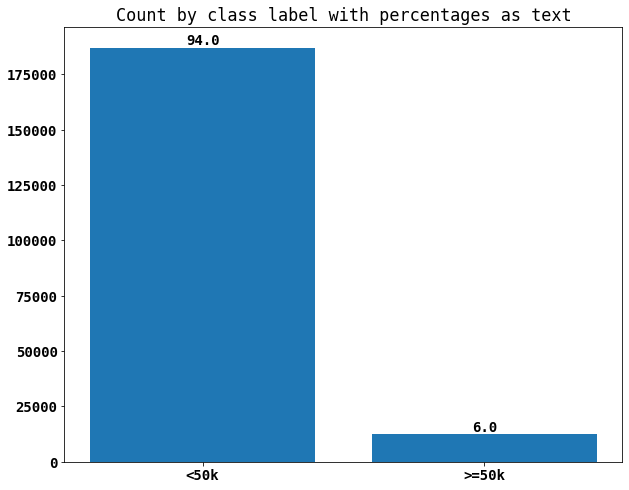

In [200]:
y_train_eda.class_balance()

,count,mean,std,min,25%,50%,75%,max
weeks worked in year,39.0,0.274,0.299,-1.813e-02,3.121e-02,0.110,0.516,1.0
tax filer stat,39.0,0.270,0.279,-1.910e-03,3.939e-02,0.137,0.524,1.0
family members under 18,39.0,0.260,0.293,-5.374e-02,5.160e-02,0.081,0.474,1.0
major industry code,39.0,0.257,0.292,-6.022e-02,2.872e-02,0.110,0.452,1.0
num persons worked for employer,39.0,0.252,0.292,-4.277e-02,1.932e-02,0.078,0.476,1.0
detailed industry recode,39.0,0.251,0.283,-5.098e-02,3.320e-02,0.109,0.429,1.0
detailed household and family stat,39.0,0.248,0.267,-2.327e-03,6.125e-02,0.102,0.388,1.0
class of worker,39.0,0.246,0.279,-8.266e-02,2.453e-02,0.106,0.473,1.0
detailed household summary in household,39.0,0.245,0.265,6.068e-04,6.413e-02,0.105,0.376,1.0
veterans benefits,39.0,0.242,0.285,-1.412e-01,2.492e-02,0.111,0.450,1.0


Feature correlation statistics, sorted by mean and standard deviation descending:
None


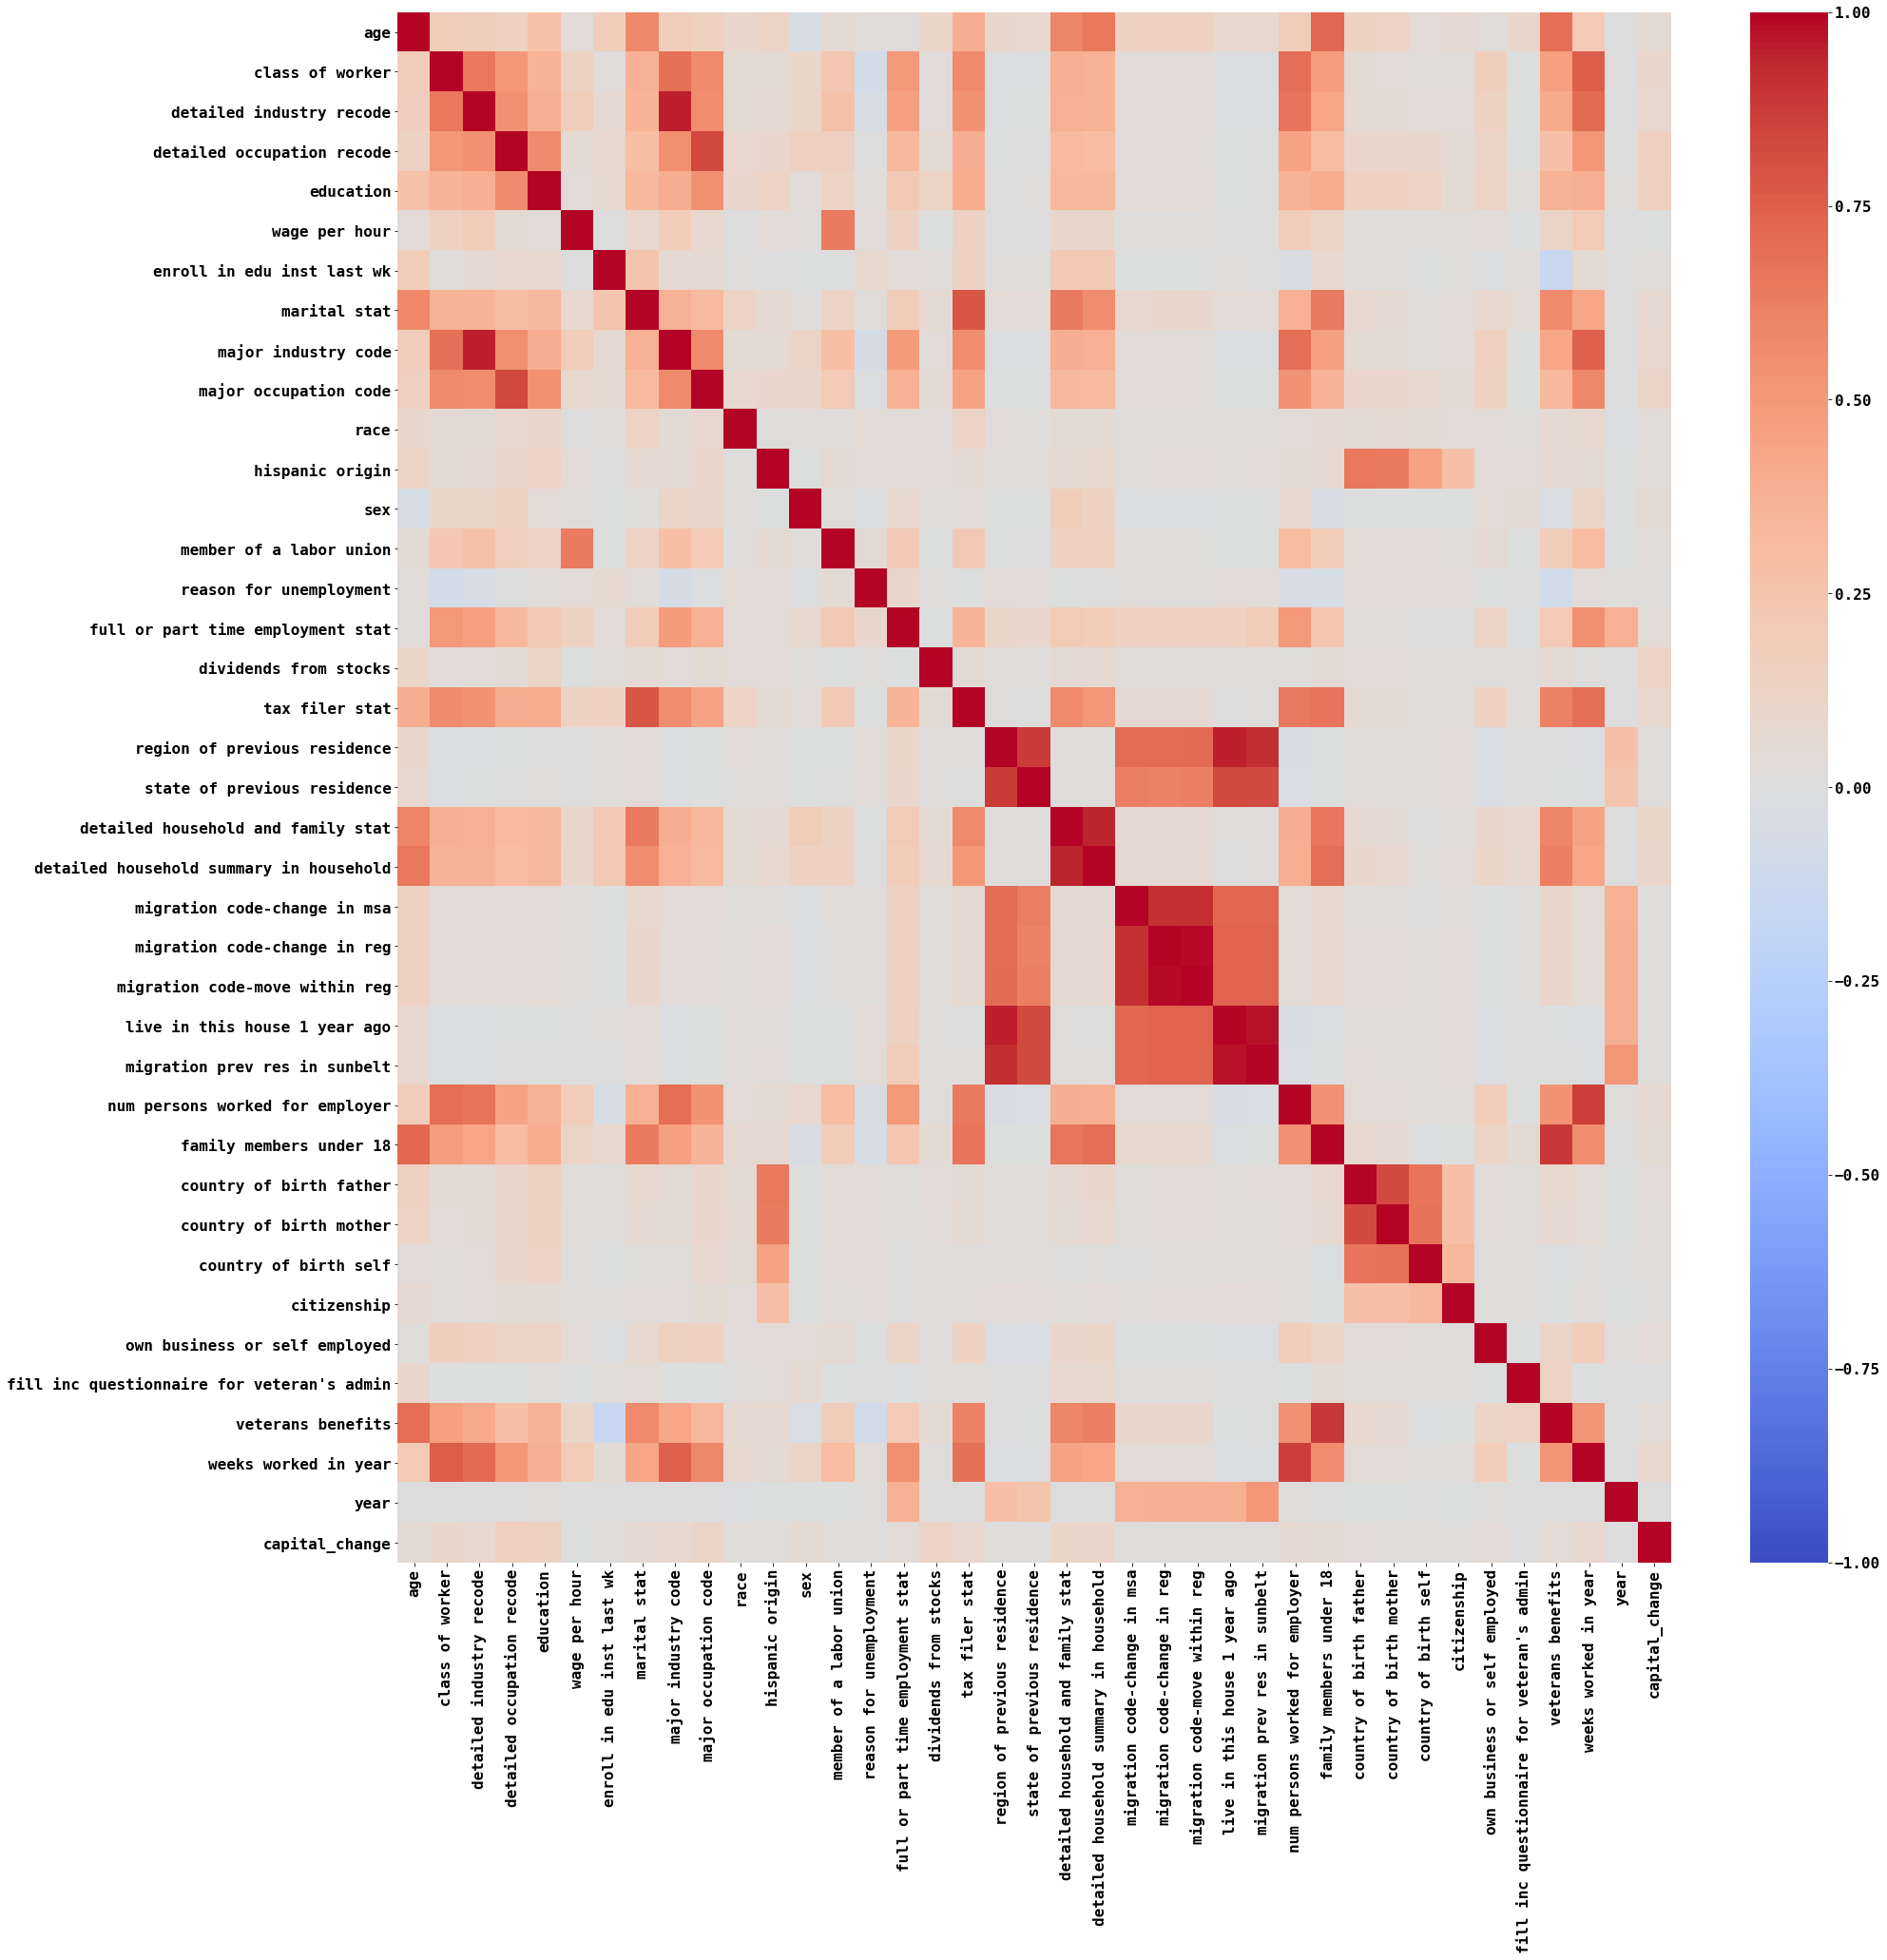

In [201]:
X_train_eda.corr_details()